<a href="https://colab.research.google.com/github/cowsilver57/sessac_test/blob/main/Chapter3_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%95%EC%A0%9C%2C_%ED%9A%8C%EA%B7%80%2C_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8%EB%A7%81_(6%2C7%EC%9D%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 수집

In [ ]:
#github와 colab 연동
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata

Cloning into 'yemoonsaBigdata'...
remote: Enumerating objects: 637, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 637 (delta 137), reused 184 (delta 109), pack-reused 361
Receiving objects: 100% (637/637), 10.76 MiB | 16.30 MiB/s, done.
Resolving deltas: 100% (321/321), done.


##데이터 로딩

In [ ]:
#csv 파일 불러오기
import pandas as pd

data = pd.read_csv("/content/yemoonsaBigdata/datasets/Part2/housing_data.csv", header=None, sep=',')
col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV','isHighValue']
data.columns = col_names

print(data.head())

#CRIM = 도시의 인당 범죄율 / ZN = 25,000 스퀘워 피트가 넘는 거주지 비율
#INDUS = 소매업이 아닌 업종 지역 비율 / CHAS = 찰스 강 인접 여부(인접하면 1, 아니면 0)
#NOX = 10ppm당 일산화질소 농도 / RM = 주택의 평균 방 개수
#AGE = 1940년 전에 지어진 자가 비율 / DIS = 5개의 보스턴 고용 센터까지의 가중치가 적용된 거리

#MEDV = 자가 주택의 중앙값 -> 우리가 관심있는 회귀 종속변수임.
#isHighValue  = MEDV를 이용해서 임의로 만들어 낸 파생변수임. MEDV값이 25 이상인 경우 1, 아니면 0이 됨.

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  isHighValue  
0     15.3  396.90   4.98  24.0            0  
1     17.8  396.90   9.14  21.6            0  
2     17.8  392.83   4.03  34.7            1  
3     18.7  394.63   2.94  33.4            1  
4     18.7  396.90   5.33  36.2            1  


#데이터 전처리

##데이터 확인

In [ ]:
#데이터는 행은 526개 열은 15개임.
print(data.shape)

#데이터의 결측치 확인하기
print(data.info())
#CRIM에서 20개의 결측치 확인됨.

(526, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB
None


In [ ]:
#데이터의 수치형 변수에 대해 기본적인 요약 통계량 값 확인하기.
print(data.describe())
#ZN 변수는 중앙값이 0임
#CHAS 변수는 3분위수가 0임.

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     3.613524   10.931559   11.306616    0.066540    0.555954    6.271076   
std      8.601545   22.977112    6.934739    0.249461    0.113854    0.698140   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.453000    5.879250   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.183500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.613500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    68.816540    3.742880    9.416350  410.547529   18.513308  357.888099   
std     27.868375    2.0836

##결측치 처리

In [ ]:
#다시 한 번 결측치 확인하기
print(data.isnull().sum())
#CRIM 변수에서 결측치가 전체 중 몇%를 차지하는지 확인하기
print(data.isnull().sum()/data.shape[0])
#약 3.8%의 결측치 비율을 확인할 수 있음.

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64
CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64


In [ ]:
#fillna 함수를 활용하여 결측치를 중앙 값으로 대체하기
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val)

In [ ]:
#결측치가 존재하는 20개의 행 제거하기
data = data.loc[data['CRIM'].notnull(),]
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

##이상치 처리
이상치를 판단하는 방법은 IQR (사분위수)를 활용하면 가장 편함.

<Axes: >

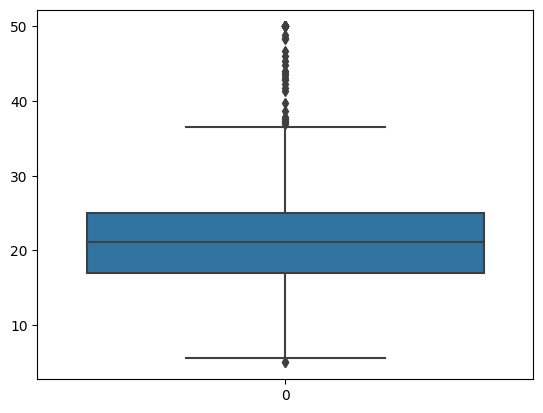

In [ ]:
#MEDV 변수 박스 플롯
import seaborn as sns

sns.boxplot(data['MEDV'])

결과: MEDV는 20 부근에 값이 주로 산포해 있고, 이상치가 존재하는 것으로 보임.

In [ ]:
#IQR 값을 구하여 이상치 비율 확인해보기
Q1, Q3 = data['MEDV'].quantile([0.25,0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print('outlier 범위 : %.2f 초과 또는 %.2f 미만'% (upper_bound, lower_bound))
print('outlier 개수 : %.0f'% len(data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)]))
print('outlier 비율 : %.2f'% (len(data[(data['MEDV']>upper_bound)|(data['MEDV']<lower_bound)])/len(data)))
#전체 중 8%가 이상치에 해당됨.

outlier 범위 : 36.96 초과 또는 5.06 미만
outlier 개수 : 40
outlier 비율 : 0.08


In [ ]:
#위의 코드를 함수화하여 전체 컬럼의 이상치 비율을 확인해보기
def get_outlier_prop(x):

    Q1, Q3 = x.quantile([0.25,0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    outliers = x[(x>upper_bound)|(x<lower_bound)]

    return str(round(100*len(outliers)/len(x),1)) + '%'
print(data.apply(get_outlier_prop))

CRIM           13.0%
ZN             13.4%
INDUS           0.0%
CHAS            6.9%
NOX             0.0%
RM              5.9%
AGE             0.0%
DIS             1.0%
RAD             0.0%
TAX             0.0%
PTRATIO         3.0%
B              15.2%
LSTAT           1.4%
MEDV            7.9%
isHighValue     0.0%
dtype: object


여기서 모든 이상치를 제거하는 것은 아님!

이상치를 모두 제가할 경우 전체 데이터 행 수가 너무 많이 줄어들 수 있음.

중요 변수에 대해서만 이상치를 제거해야함.

또한, 통계적으로는 이상치이지만 의미상 이상치가 아닐 수 있음.

따라서 실무에서는 변수의 의미, 종속 변수를 비롯한 다른 변수와의 관계를 충분히 파악한 후 이상치를 제거해야 함.

In [ ]:
#이상치 제거 예시 1
#IQR 값 기준으로 MEDV 변수의 이상치 제거
Q1, Q3 = data['MEDV'].quantile([0.25,0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

data1 = data[(data['MEDV']<upper_bound)&(data['MEDV']>= lower_bound)]
data1.shape

(466, 15)

In [ ]:
#이상치 제거 예시 2
#MEDV 변수 값이 45 이상인 경우를 이상치로 보고 제거
data2 = data[~(data['MEDV']>=45)]
data2.shape

(484, 15)

##변수 변환

1. 변수의 분포가 한쪽으로 크게 치우쳐 있어 정규분포를 따른다고 보기 힘든 경우
2. 데이터 스케일링(각 변수별로 데이터의 범위 및 단위가 다른 경우)



###왜도가 큰 몇 개 변수에 대해 로그 변환을 하는 방법

<ipython-input-14-f624f9094ea2>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax = axs[_row][_col])
<ipython-input-14-f624f9094ea2>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax = axs[_row][_col])
<ipython-input-14-f624f9094ea2>:11: UserWarning: 

`di

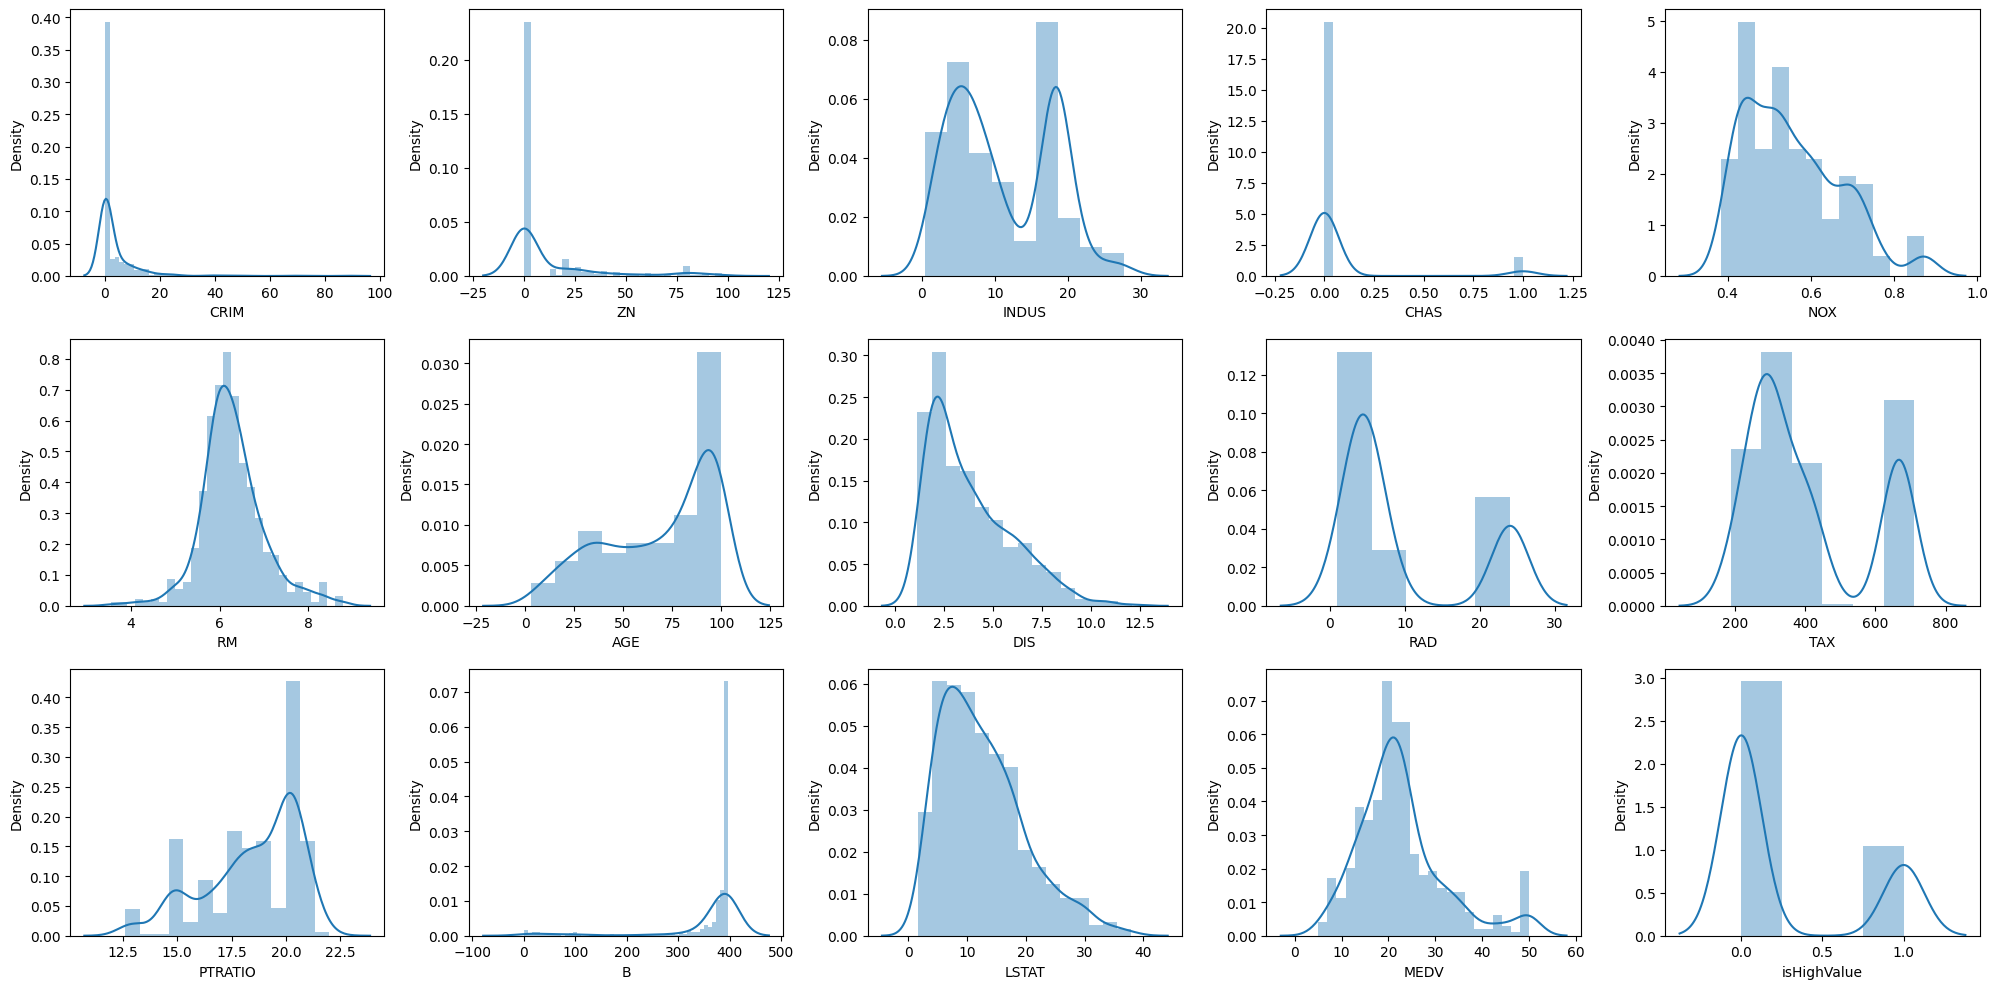

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns

fig,axs = plt.subplots(ncols=5,nrows=3,figsize=(20,10))
idx = 0
for _row in range(3):
    for _col in range(5):
        if idx < len(cols):
            sns.distplot(data[cols[idx]], ax = axs[_row][_col])
            idx += 1

plt.tight_layout()

결과를 확인해보면 CRIM, ZN, B 변수는 한 쪽으로 치우쳐 있음.

-> 왜도 값을 확인해보기(왜도의 절댓값이 3 이상이면 크게 치우쳐져 있다고 봄)

In [ ]:
print(data.apply(lambda x: x.skew(),axis=0))
#CRIM 변수의 왜도가 5.22로 3보다 크게 나왔음

CRIM           5.223149
ZN             2.225666
INDUS          0.295022
CHAS           3.405904
NOX            0.729308
RM             0.403612
AGE           -0.598963
DIS            1.011781
RAD            1.004815
TAX            0.669956
PTRATIO       -0.802325
B             -2.890374
LSTAT          0.906460
MEDV           1.108098
isHighValue    1.092403
dtype: float64


In [ ]:
#로그 변환을 해줌.
import numpy as np
data['CRIM'] = np.log1p(data['CRIM'])
print(data['CRIM'].skew())
#왜도 값이 1.27로 분포의 치우침이 해소됨.

1.2692005882725572


#회귀 모델링

##데이터 탐색

In [ ]:
#데이터 생성
df_r = data.drop(['isHighValue'],axis=1)

#corr 함수를 활용하여 변수 상관관계 확인
#기본적으로 피어슨의 상관관계 계수 값을 보여줌. 변수 간의 선형 관계를 나타냄.

cols = ['MEDV','LSTAT','RM','CHAS','RAD','TAX']
print(df_r[cols].corr())

           MEDV     LSTAT        RM      CHAS       RAD       TAX
MEDV   1.000000 -0.737663  0.695360  0.175260 -0.381626 -0.468536
LSTAT -0.737663  1.000000 -0.613808 -0.053929  0.488676  0.543993
RM     0.695360 -0.613808  1.000000  0.091251 -0.209847 -0.292048
CHAS   0.175260 -0.053929  0.091251  1.000000 -0.007368 -0.035587
RAD   -0.381626  0.488676 -0.209847 -0.007368  1.000000  0.910228
TAX   -0.468536  0.543993 -0.292048 -0.035587  0.910228  1.000000


* MEDV와 LSTAT 변수 사이의 상관관계는 -0.7357로 강한 음의 상관관계를 가짐
* MEDV와 RM 변수 사이의 상관관계는 -0.6960로 강한 양의 상관관계를 가짐

-> 독립변수들 간에 강한 상관관계가 존재할 경우 다중공선성을 갖는다고 함.

-> 다중공산성이 존재하는 경우 회귀 모델성능에 안 좋은 영향을 줄 수 있어서 제거하는 것이 좋음.

##분석 모형 구축

###데이터 분할

In [ ]:
#학습 데이터와 검증 데이터를7:3의 비율로 나누기
from sklearn.model_selection import train_test_split

#분석 모델링에 사용할 변수들을 X_cols라는 리스트에 저장
x_cols = ['LSTAT','PTRATIO','TAX','AGE','NOX','INDUS','CRIM']
#전체 데이터에서 X, y 데이터 지정
x = df_r[x_cols].values
y = df_r['MEDV'].values

#train_test_split 함수를 사용하여 전체 X,Y 데이터를 학습용 X,Y, 검증용 X,Y 데이터로 분할
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x, y, test_size=0.3, random_state=123)

### 데이터 스케일링

In [ ]:
#데이터 분할 후 데이터 스케일링 진행
#min-max 스케일링 방법 사용

#MinMaxScaler 함수 선언
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit_transform 함수를 이용하여 학습 데이터에 적합 및 변환시켜 저장
x_train_r_scaled = scaler.fit_transform(x_train_r)
x_test_r_scaled = scaler.transform(x_test_r)

###모델 구축

In [ ]:
#1. 선형 회귀 학습
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train_r_scaled, y_train_r)

#coef_ 함수를 사용하면 선형 회귀 모델의 계수 확인하기
print(model_lr.coef_)
#계수 값의 부호가 양 => 종속변수와 해당 변수가 양의 관계
#계수 값의 부호가 음 => 종속변수와 해당 변수가 음의 관계

#intercept_ 함수를 사용하여 선형 회귀 모델의 절편 확인하기
print(model_lr.intercept_)

[-32.51042803 -11.94191767  -3.84240793   5.58034429  -4.34593586
   0.98706819   6.83941179]
38.03006298623824


In [ ]:
#2. SVM
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(x_train_r_scaled, y_train_r)

SVR()

In [ ]:
#3. 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(random_state=123)
model_rfr.fit(x_train_r_scaled, y_train_r)

#feature_importances_ 함수를 활용하여 모델에서 사용하는 변수 중요도 확인하기
for x, val in zip(x_cols, model_rfr.feature_importances_):
    print(f'{x} : %.3f'%val)

LSTAT : 0.718
PTRATIO : 0.070
TAX : 0.040
AGE : 0.038
NOX : 0.056
INDUS : 0.013
CRIM : 0.064


## 분석 모형 평가

In [ ]:
#예측값 생성
y_pred_lr = model_lr.predict(x_test_r_scaled)
y_pred_svr = model_svr.predict(x_test_r_scaled)
y_pred_rfr = model_rfr.predict(x_test_r_scaled)

#평가 지표 계산
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('-'*30)
print('선형 회귀 결과')
print('MAE: %.3f'%mean_absolute_error(y_test_r, y_pred_lr))
print('MSE: %.3f'%mean_squared_error(y_test_r, y_pred_lr))
print('MAPE: %.3f'%mean_absolute_percentage_error(y_test_r, y_pred_lr))

print('-'*30)
print('SVM 결과')
print('MAE: %.3f'%mean_absolute_error(y_test_r, y_pred_svr))
print('MSE: %.3f'%mean_squared_error(y_test_r, y_pred_svr))
print('MAPE: %.3f'%mean_absolute_percentage_error(y_test_r, y_pred_svr))

print('-'*30)
print('랜덤포레스트 결과')
print('MAE: %.3f'%mean_absolute_error(y_test_r, y_pred_rfr))
print('MSE: %.3f'%mean_squared_error(y_test_r, y_pred_rfr))
print('MAPE: %.3f'%mean_absolute_percentage_error(y_test_r, y_pred_rfr))

------------------------------
선형 회귀 결과
MAE: 4.408
MSE: 34.861
MAPE: 0.223
------------------------------
SVM 결과
MAE: 3.846
MSE: 36.890
MAPE: 0.170
------------------------------
랜덤포레스트 결과
MAE: 2.967
MSE: 17.955
MAPE: 0.147


#분류 모델링

##데이터 탐색

<Axes: xlabel='isHighValue', ylabel='LSTAT'>

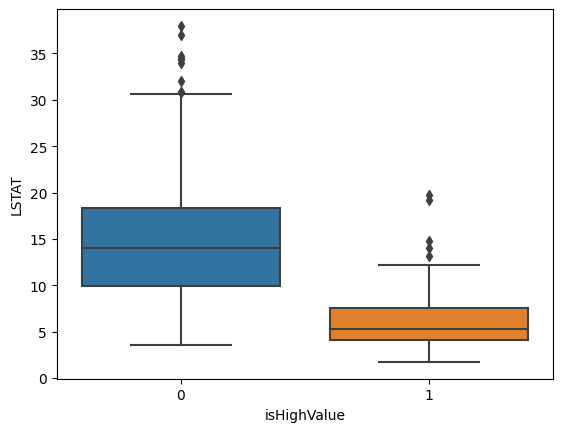

In [ ]:
#회귀 모델의 종속변수인 MEDV 변수는 제외하고 데이터프레임으로 저장
df_c = data.drop(['MEDV'], axis = 1)

#종속변수 값에 다른 독립변수의 분포 비교
import seaborn as sns
sns.boxplot(x='isHighValue', y='LSTAT', data=df_c)

<Axes: xlabel='LSTAT', ylabel='Density'>

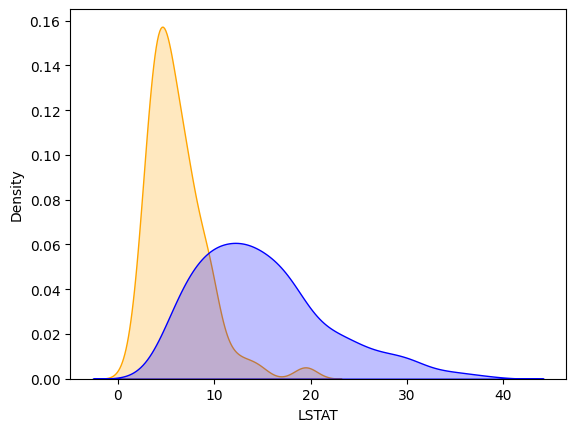

In [ ]:
import seaborn as sns

sns.kdeplot(df_c.loc[df_c['isHighValue'] == 1, 'LSTAT'], color='orange', fill=True)
sns.kdeplot(df_c.loc[df_c['isHighValue'] == 0, 'LSTAT'], color='blue', fill=True)


In [ ]:
#isHighValue 값별 변수 평균
import numpy as np
print(df_c.groupby('isHighValue').apply(np.mean).T)

isHighValue           0           1
CRIM           0.975497    0.354194
ZN             6.691176   24.602273
INDUS         12.777353    6.488485
CHAS           0.050802    0.121212
NOX            0.575957    0.494454
RM             6.028837    7.009394
AGE           73.275134   55.257576
DIS            3.593655    4.365642
RAD           10.729947    6.204545
TAX          440.788770  316.007576
PTRATIO       18.994920   16.927273
B            346.706738  384.914697
LSTAT         14.949652    6.146061
isHighValue    0.000000    1.000000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## 분석 모형 구축

### 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

x_cols = ['LSTAT','PTRATIO','TAX','AGE','NOX','INDUS','CRIM']

x = data[x_cols].values
y = data['isHighValue'].values

#train_test_split 함수를 사용하여 전체 X,Y 데이터를 학습용 X,Y, 검증용 X,Y 데이터로 분할
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x, y, test_size=0.3, random_state=123)

###데이터 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_c_scaled = scaler.fit_transform(x_train_c)
x_test_c_scaled = scaler.transform(x_test_c)

###모델 구축

In [ ]:
#1. 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(x_train_c_scaled, y_train_c)

print(model_lo.coef_)
print(model_lo.intercept_)

#2. SVM
from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(x_train_c_scaled, y_train_c)

#3. 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state = 123)
model_rfc.fit(x_train_c_scaled, y_train_c)

for x, val in zip(x_cols, model_rfc.feature_importances_):
    print(f'{x}:%.3f'%val)

[[-4.67917856 -2.26271976 -0.80852617  0.45926521 -0.32914015 -1.36930599
   0.86834454]]
[1.90334599]
LSTAT:0.378
PTRATIO:0.105
TAX:0.112
AGE:0.087
NOX:0.080
INDUS:0.134
CRIM:0.104


##분석 모형 구축

위와 같은 방법으로 시행!

데이터만 x_train_c_scaled로 바꾸면 됨.